Завдання 2

## EDA

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

In [2]:
df = pd.read_csv('../data/cure_the_rincess.csv')
df

,Phoenix Feather,Unicorn Horn,Dragon's Blood,Mermaid Tears,Fairy Dust,Goblin Toes,Witch's Brew,Griffin Claw,Troll Hair,Kraken Ink,Minotaur Horn,Basilisk Scale,Chimera Fang,Cured
0,2.4,18.7,18.4,27.9,7.9,9.6,18.3,13.2,2.5,26.0,10.5,26.2,12.5,0
1,2.1,6.0,15.0,13.3,15.6,13.1,11.0,5.0,7.2,26.0,1.5,13.3,6.2,0
2,17.2,13.9,23.8,6.8,10.7,15.8,19.4,2.7,15.4,21.2,11.1,16.6,11.4,1
3,8.4,9.7,6.8,26.9,4.6,29.1,14.6,19.7,18.0,20.8,13.6,13.9,8.1,1
4,22.1,10.8,16.4,10.5,22.0,23.4,2.6,18.2,23.8,11.3,5.5,16.8,16.2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2333,9.4,2.2,15.8,5.9,29.7,18.7,11.5,13.1,15.3,22.5,10.1,4.7,13.8,0
2334,12.1,7.6,20.6,5.3,18.9,19.1,9.4,11.9,21.8,12.0,26.7,8.4,24.4,1
2335,15.2,33.2,7.2,14.5,16.0,16.7,1.2,32.5,34.5,25.9,3.9,18.0,19.2,1
2336,2.0,17.0,33.2,13.2,29.1,35.5,19.7,30.3,30.7,4.3,15.7,20.5,2.1,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2338 entries, 0 to 2337
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Phoenix Feather  2338 non-null   float64
 1   Unicorn Horn     2338 non-null   float64
 2   Dragon's Blood   2338 non-null   float64
 3   Mermaid Tears    2338 non-null   float64
 4   Fairy Dust       2338 non-null   float64
 5   Goblin Toes      2338 non-null   float64
 6   Witch's Brew     2338 non-null   float64
 7   Griffin Claw     2338 non-null   float64
 8   Troll Hair       2338 non-null   float64
 9   Kraken Ink       2338 non-null   float64
 10  Minotaur Horn    2338 non-null   float64
 11  Basilisk Scale   2338 non-null   float64
 12  Chimera Fang     2338 non-null   float64
 13  Cured            2338 non-null   int64  
dtypes: float64(13), int64(1)
memory usage: 255.8 KB


In [4]:
df.duplicated().sum()

np.int64(0)

In [5]:
df.drop_duplicates(inplace=True)
df.columns 

Index(['Phoenix Feather', 'Unicorn Horn', 'Dragon's Blood', 'Mermaid Tears',
       'Fairy Dust', 'Goblin Toes', 'Witch's Brew', 'Griffin Claw',
       'Troll Hair', 'Kraken Ink', 'Minotaur Horn', 'Basilisk Scale',
       'Chimera Fang', 'Cured'],
      dtype='object')

In [6]:
df

,Phoenix Feather,Unicorn Horn,Dragon's Blood,Mermaid Tears,Fairy Dust,Goblin Toes,Witch's Brew,Griffin Claw,Troll Hair,Kraken Ink,Minotaur Horn,Basilisk Scale,Chimera Fang,Cured
0,2.4,18.7,18.4,27.9,7.9,9.6,18.3,13.2,2.5,26.0,10.5,26.2,12.5,0
1,2.1,6.0,15.0,13.3,15.6,13.1,11.0,5.0,7.2,26.0,1.5,13.3,6.2,0
2,17.2,13.9,23.8,6.8,10.7,15.8,19.4,2.7,15.4,21.2,11.1,16.6,11.4,1
3,8.4,9.7,6.8,26.9,4.6,29.1,14.6,19.7,18.0,20.8,13.6,13.9,8.1,1
4,22.1,10.8,16.4,10.5,22.0,23.4,2.6,18.2,23.8,11.3,5.5,16.8,16.2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2333,9.4,2.2,15.8,5.9,29.7,18.7,11.5,13.1,15.3,22.5,10.1,4.7,13.8,0
2334,12.1,7.6,20.6,5.3,18.9,19.1,9.4,11.9,21.8,12.0,26.7,8.4,24.4,1
2335,15.2,33.2,7.2,14.5,16.0,16.7,1.2,32.5,34.5,25.9,3.9,18.0,19.2,1
2336,2.0,17.0,33.2,13.2,29.1,35.5,19.7,30.3,30.7,4.3,15.7,20.5,2.1,1


In [7]:
TARGET = "Cured"
FEATURES = [col for col in df.columns if col != TARGET]

# Визначення категоріальних та числових ознак
cat_features = [col for col in FEATURES if df[col].nunique() < 25]
cont_features = [col for col in FEATURES if df[col].nunique() >= 25]

# Виведення результатів
print(f'Number of categorical features: {len(cat_features)}')
print('Categorical features:', cat_features, '\n')

print(f'Number of continuous features: {len(cont_features)}')
print('Continuous features:', cont_features, '\n')

Number of categorical features: 0
Categorical features: [] 

Number of continuous features: 13
Continuous features: ['Phoenix Feather', 'Unicorn Horn', "Dragon's Blood", 'Mermaid Tears', 'Fairy Dust', 'Goblin Toes', "Witch's Brew", 'Griffin Claw', 'Troll Hair', 'Kraken Ink', 'Minotaur Horn', 'Basilisk Scale', 'Chimera Fang'] 



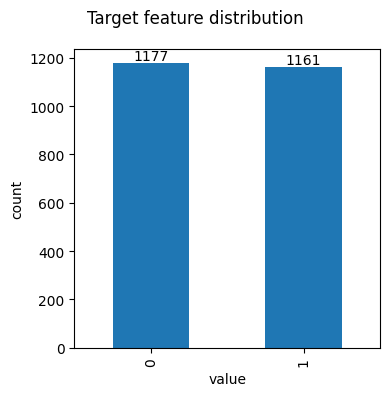

In [8]:
ax = df[TARGET].value_counts().plot(kind='bar', figsize=(4, 4))
for i in ax.containers:
  ax.bar_label(i)
  ax.set_xlabel("value")
  ax.set_ylabel("count")

plt.suptitle("Target feature distribution")

plt.tight_layout()
plt.show()

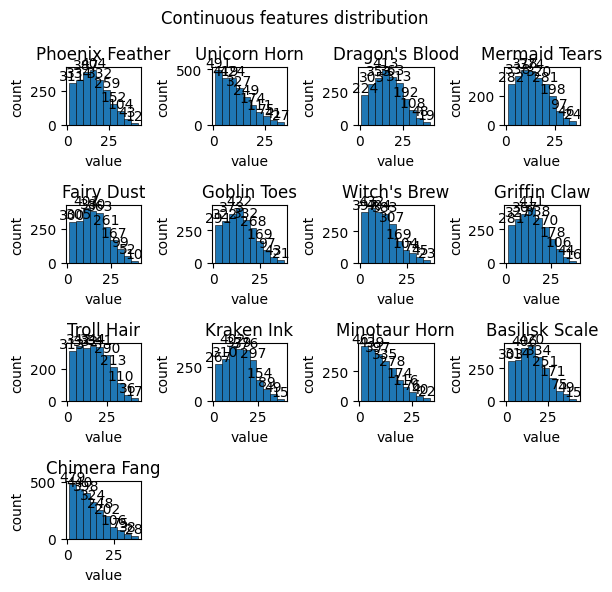

In [9]:
ax = df.loc[:, cont_features].hist(figsize=(6, 6), grid=False, edgecolor='black', linewidth=.4)
for row in ax:
  for col in row:
    for i in col.containers:
      col.bar_label(i)
      col.set_xlabel("value")
      col.set_ylabel("count")

plt.suptitle("Continuous features distribution")

plt.tight_layout()
plt.show()

In [10]:
df.describe()

,Phoenix Feather,Unicorn Horn,Dragon's Blood,Mermaid Tears,Fairy Dust,Goblin Toes,Witch's Brew,Griffin Claw,Troll Hair,Kraken Ink,Minotaur Horn,Basilisk Scale,Chimera Fang,Cured
count,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000
mean,15.365697,10.946749,16.115654,13.627973,15.069504,14.157271,12.328914,14.911206,16.871685,14.890590,10.916125,15.371600,12.084003,0.496578
std,8.669969,7.225162,8.372518,7.545244,8.349340,7.831476,7.709753,8.132678,9.579027,8.014197,7.045195,8.559139,8.047540,0.500095
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,8.500000,5.300000,9.600000,7.600000,8.625000,7.900000,6.325000,8.400000,8.900000,8.800000,5.200000,8.800000,5.600000,0.000000
50%,14.700000,9.500000,15.800000,13.100000,14.500000,13.500000,11.200000,14.400000,16.300000,14.400000,9.700000,14.800000,10.500000,0.000000
75%,21.300000,15.575000,22.000000,19.000000,20.700000,19.500000,16.900000,20.500000,24.000000,20.400000,15.375000,21.100000,17.275000,1.000000
max,42.100000,34.100000,40.800000,35.800000,40.400000,37.800000,37.300000,39.400000,44.800000,39.500000,33.700000,42.000000,37.800000,1.000000


In [11]:
df.isnull().sum()

Phoenix Feather    0
Unicorn Horn       0
Dragon's Blood     0
Mermaid Tears      0
Fairy Dust         0
Goblin Toes        0
Witch's Brew       0
Griffin Claw       0
Troll Hair         0
Kraken Ink         0
Minotaur Horn      0
Basilisk Scale     0
Chimera Fang       0
Cured              0
dtype: int64

In [12]:
df.dtypes

Phoenix Feather    float64
Unicorn Horn       float64
Dragon's Blood     float64
Mermaid Tears      float64
Fairy Dust         float64
Goblin Toes        float64
Witch's Brew       float64
Griffin Claw       float64
Troll Hair         float64
Kraken Ink         float64
Minotaur Horn      float64
Basilisk Scale     float64
Chimera Fang       float64
Cured                int64
dtype: object

In [13]:
# Розрахунок кореляції
correlation_matrix = df.corr()

# Виведення кореляцій з цільовою змінною 'Cured'
correlation_with_class = correlation_matrix[TARGET].sort_values(ascending=False)
correlation_with_class

Cured              1.000000
Troll Hair         0.498165
Witch's Brew       0.245993
Goblin Toes        0.046314
Chimera Fang       0.022144
Phoenix Feather    0.015931
Fairy Dust         0.015004
Minotaur Horn      0.011329
Mermaid Tears      0.009619
Griffin Claw       0.001019
Dragon's Blood    -0.007662
Unicorn Horn      -0.008239
Kraken Ink        -0.022845
Basilisk Scale    -0.052436
Name: Cured, dtype: float64

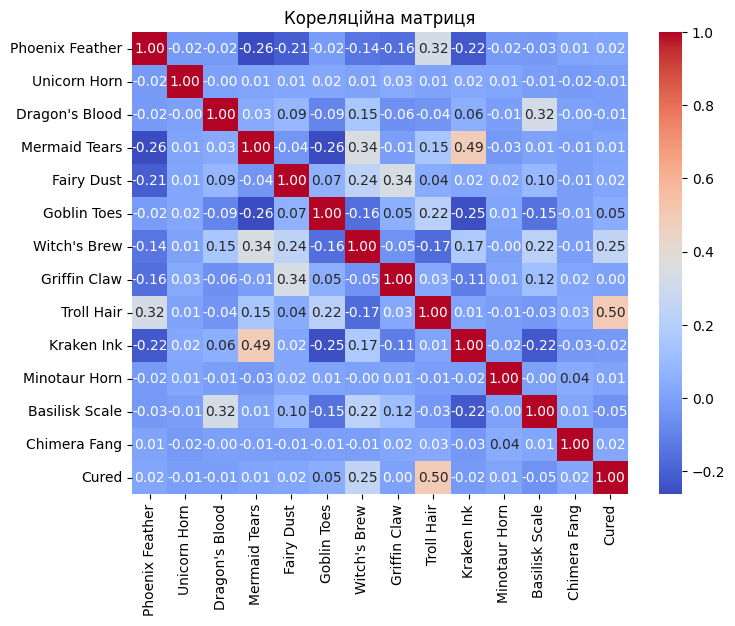

In [14]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix , annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Кореляційна матриця')
plt.show()

## Train

In [15]:
X = df.drop(TARGET, axis=1)
y = df[TARGET]

# Розділяємо на навчальні та тестові дані
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
log_reg = LogisticRegression()

# Визначаємо сітку параметрів для пошуку
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # параметр регуляризації
    'solver': ['lbfgs', 'liblinear'],  # алгоритми оптимізації
    'max_iter': [100, 200, 300]  # кількість ітерацій
}

# Використовуємо GridSearchCV для пошуку найкращих параметрів
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Отримуємо найкращі параметри
best_params = grid_search.best_params_
print("Найкращі параметри: ", best_params)

Найкращі параметри:  {'C': 10, 'max_iter': 100, 'solver': 'lbfgs'}


In [18]:
# Прогнозуємо, використовуючи найкращу модель
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

In [19]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.90      0.89       231
           1       0.90      0.89      0.89       237

    accuracy                           0.89       468
   macro avg       0.89      0.89      0.89       468
weighted avg       0.89      0.89      0.89       468



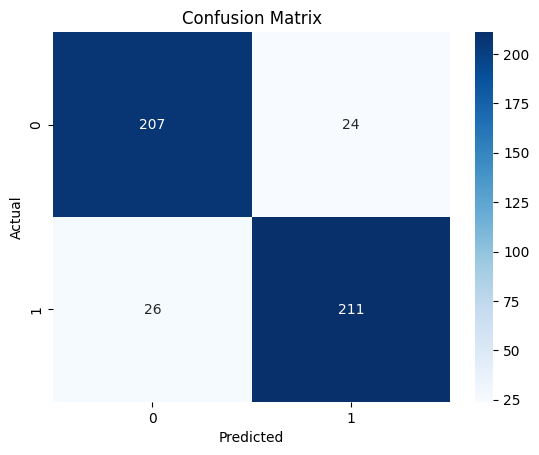

In [20]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [21]:
import numpy as np
# Отримуємо DataFrame з тестовими даними, справжніми та прогнозованими результатами
results = pd.DataFrame({
    'True Label': y_test,
    'Predicted Label': y_pred
})

# Вибираємо 10 випадкових прикладів
random_indices = np.random.choice(results.index, 10, replace=False)
random_results = results.loc[random_indices]

# Виводимо ці приклади
print(random_results)

      True Label  Predicted Label
51             0                1
1944           0                0
1948           0                0
838            0                0
2296           1                1
785            1                1
1943           0                0
1467           1                1
1161           0                0
1647           1                1


In [22]:
model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

In [23]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.90      0.89       231
           1       0.90      0.89      0.89       237

    accuracy                           0.89       468
   macro avg       0.89      0.89      0.89       468
weighted avg       0.89      0.89      0.89       468



**Логістична регресія**

In [24]:
df.head()

,Phoenix Feather,Unicorn Horn,Dragon's Blood,Mermaid Tears,Fairy Dust,Goblin Toes,Witch's Brew,Griffin Claw,Troll Hair,Kraken Ink,Minotaur Horn,Basilisk Scale,Chimera Fang,Cured
0,2.4,18.7,18.4,27.9,7.9,9.6,18.3,13.2,2.5,26.0,10.5,26.2,12.5,0
1,2.1,6.0,15.0,13.3,15.6,13.1,11.0,5.0,7.2,26.0,1.5,13.3,6.2,0
2,17.2,13.9,23.8,6.8,10.7,15.8,19.4,2.7,15.4,21.2,11.1,16.6,11.4,1
3,8.4,9.7,6.8,26.9,4.6,29.1,14.6,19.7,18.0,20.8,13.6,13.9,8.1,1
4,22.1,10.8,16.4,10.5,22.0,23.4,2.6,18.2,23.8,11.3,5.5,16.8,16.2,0


In [25]:
#Для подальших коректних обрахунків транспонуємо матрицю вхідних ознак і вектор цільової змінної.

x_train = X_train.T
x_test = X_test.T
y_train = np.expand_dims(y_train.T, 0)
y_test = np.expand_dims(y_test.T, 0)

print('X train size', x_train.shape)
print('X test size', x_test.shape)
print('y train size', y_train.shape)
print('y test size', y_test.shape)

X train size (13, 1870)
X test size (13, 468)
y train size (1, 1870)
y test size (1, 468)


In [26]:
#Ініціалізація параметрів моделі
def initialize_weights_and_bias(dimension):
    # dimension - number of input features
    w = np.full((dimension,), 0.01)  # Одновимірний масив
    b = 0.0
    return w, b

In [27]:
def sigmoid(z):
    y_head = 1/(1+np.exp(-z))
    return y_head

In [28]:
def forward_backward_propagation(w,b,x_train,y_train, eps=1e-5):

    # forward propagation
    z = np.dot(w.T,x_train) + b
    y_head = sigmoid(z)
    loss = -1*y_train*np.log(y_head+eps)-(1-y_train)*np.log(1-y_head+eps)
    cost = (np.sum(loss))/x_train.shape[1]      # x_train.shape[1]  is for scaling

    # backward propagation
    derivative_weight = (np.dot(x_train, ((y_head - y_train).T)) / x_train.shape[1]).squeeze()
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]                 # x_train.shape[1]  is for scaling
    gradients = {"derivative_weight": derivative_weight,"derivative_bias": derivative_bias}
    return cost, gradients

In [29]:
def compute_accuracy(y_head, y_train):
    predictions = (y_head > 0.5).astype(int)  # Бінарне перетворення ймовірностей у класи
    accuracy = np.mean(predictions == y_train)  # Середня точність
    return accuracy

In [30]:
def update(w, b, x_train, y_train, learning_rate, number_of_iterations):
    cost_list = []
    accuracy_list = []
    index = []

    for i in range(number_of_iterations):
        cost, gradients = forward_backward_propagation(w, b, x_train, y_train)
        y_head = sigmoid(np.dot(w.T, x_train) + b)
        accuracy = compute_accuracy(y_head, y_train)

        cost_list.append(cost)
        accuracy_list.append(accuracy)
        index.append(i)

        w = w - learning_rate * gradients["derivative_weight"].squeeze()
        b = b - learning_rate * gradients["derivative_bias"]

    parameters = {"weight": w, "bias": b}

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(index, cost_list, label='Cost')
    plt.xticks(index, rotation='vertical')
    plt.xlabel("Number of Iterations")
    plt.ylabel("Cost")
    plt.title('Графік функції втрат')
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(index, accuracy_list, label='Accuracy', color='orange')
    plt.xticks(index, rotation='vertical')
    plt.xlabel("Number of Iterations")
    plt.ylabel("Accuracy")
    plt.title('Графік точності')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

    return parameters, gradients, cost_list, accuracy_list

In [31]:
def predict(w, b, x_test):
    z = sigmoid(np.dot(w.T, x_test) + b)

    # Гарантуємо, що z має форму (1, N)
    z = z.reshape(1, -1)

    Y_prediction = np.zeros((1, z.shape[1]))

    # Якщо z > 0.5, то клас 1, інакше 0
    for i in range(z.shape[1]):
        Y_prediction[0, i] = 1 if z[0, i] > 0.5 else 0

    return Y_prediction

In [32]:
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate, num_iterations):
    # Ініціалізація
    dimension = x_train.shape[0]
    w, b = initialize_weights_and_bias(dimension)

    # Оновлення параметрів і отримання всіх значень
    parameters, gradients, cost_list, accuracy_list = update(w, b, x_train, y_train, learning_rate, num_iterations)

    # Прогнозування
    y_prediction_test = predict(parameters["weight"], parameters["bias"], x_test)
    y_prediction_train = predict(parameters["weight"], parameters["bias"], x_train)

    # Розрахунок точності
    train_accuracy = np.mean(y_prediction_train == y_train) * 100
    test_accuracy = np.mean(y_prediction_test == y_test) * 100

    # Виведення точності
    print("Train accuracy: {:.2f} %".format(train_accuracy))
    print("Test accuracy: {:.2f} %".format(test_accuracy))

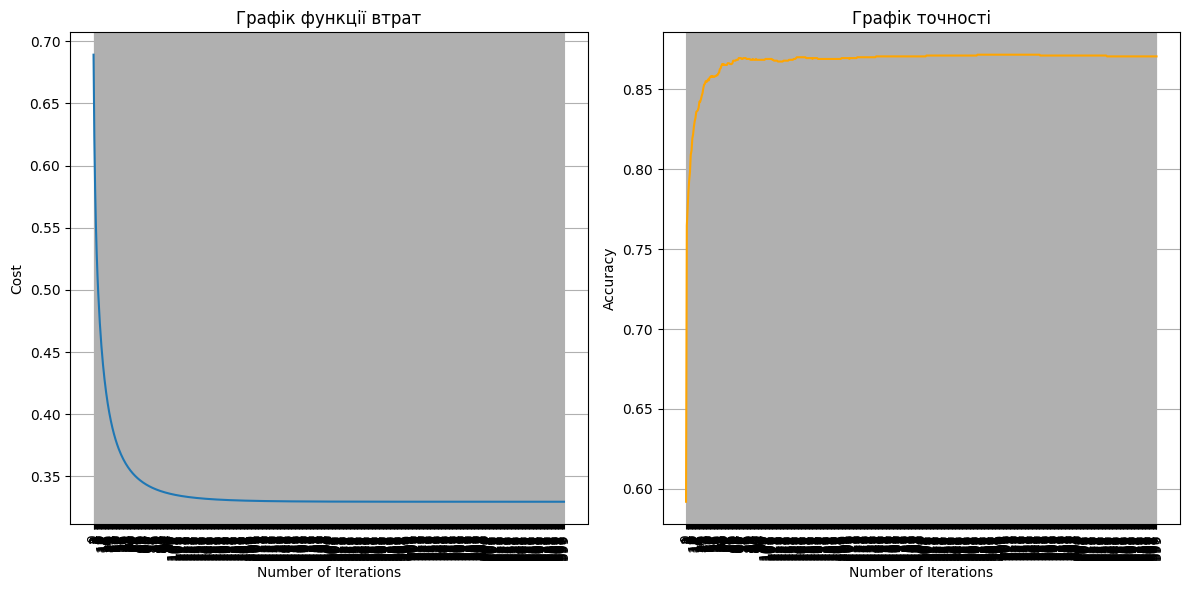

Train accuracy: 87.06 %
Test accuracy: 89.32 %


In [33]:
logistic_regression(x_train, y_train, x_test, y_test,learning_rate = 1, num_iterations = 600)